<h1> EC558 Project Core Pipeline</h1>

<h2> 1: Data Loading and Initial Inspection </h2>

<h3>1.1: Imports and Basic Setup</h3>

In [25]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", None) 

DATA_DIR = "../data" 
RAW_FILE = os.path.join(DATA_DIR, "historicdata_15min_6months_raw.csv")

<h3>1.2: Load Raw Dataset </h3>

In [2]:
df_raw = pd.read_csv(RAW_FILE) 
print("Shape (rows, columns):", df_raw.shape)
df_raw.head()

Shape (rows, columns): (4418, 18)


,Date Time,Date Time(RAW),Traffic Total (volume),Traffic Total (volume)(RAW),Traffic Total (speed),Traffic Total (speed)(RAW),Traffic In (volume),Traffic In (volume)(RAW),Traffic In (speed),Traffic In (speed)(RAW),Traffic Out (volume),Traffic Out (volume)(RAW),Traffic Out (speed),Traffic Out (speed)(RAW),Downtime,Downtime(RAW),Coverage,Coverage(RAW)
0,3/1/2025 12:00:00 AM - 1:00:00 AM,45716.95833,"331,414,316 KByte",3.390000e+11,"752,542 kbit/s",94067760.37,"34,990,821 KByte",3.583060e+10,"79,454 kbit/s",9931701.854,"296,423,494 KByte",3.040000e+11,"673,088 kbit/s",84136058.51,0%,0.0,100%,10000.0
1,3/1/2025 1:00:00 AM - 2:00:00 AM,45717.00000,"309,228,336 KByte",3.170000e+11,"703,723 kbit/s",87965368.47,"33,772,629 KByte",3.458317e+10,"76,858 kbit/s",9607210.576,"275,455,708 KByte",2.820000e+11,"626,865 kbit/s",78358157.90,0%,0.0,100%,9999.0
2,3/1/2025 2:00:00 AM - 3:00:00 AM,45717.04167,"274,829,321 KByte",2.810000e+11,"625,443 kbit/s",78180405.69,"29,956,768 KByte",3.067573e+10,"68,174 kbit/s",8521770.157,"244,872,552 KByte",2.510000e+11,"557,269 kbit/s",69658635.54,0%,0.0,100%,9999.0
3,3/1/2025 3:00:00 AM - 4:00:00 AM,45717.08333,"219,381,312 KByte",2.250000e+11,"499,257 kbit/s",62407169.45,"23,546,502 KByte",2.411162e+10,"53,586 kbit/s",6698248.380,"195,834,811 KByte",2.010000e+11,"445,671 kbit/s",55708921.07,0%,0.0,100%,9999.0
4,3/1/2025 4:00:00 AM - 5:00:00 AM,45717.12500,"169,163,809 KByte",1.730000e+11,"384,971 kbit/s",48121314.89,"22,602,400 KByte",2.314486e+10,"51,437 kbit/s",6429609.299,"146,561,410 KByte",1.500000e+11,"333,534 kbit/s",41691705.60,0%,0.0,100%,9999.0


<h3>1.3: Basic Info About Columns</h3>

In [3]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4418 entries, 0 to 4417
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date Time                    4418 non-null   object 
 1   Date Time(RAW)               4416 non-null   float64
 2   Traffic Total (volume)       4418 non-null   object 
 3   Traffic Total (volume)(RAW)  4416 non-null   float64
 4   Traffic Total (speed)        4417 non-null   object 
 5   Traffic Total (speed)(RAW)   4416 non-null   float64
 6   Traffic In (volume)          4418 non-null   object 
 7   Traffic In (volume)(RAW)     4416 non-null   float64
 8   Traffic In (speed)           4417 non-null   object 
 9   Traffic In (speed)(RAW)      4416 non-null   float64
 10  Traffic Out (volume)         4418 non-null   object 
 11  Traffic Out (volume)(RAW)    4416 non-null   float64
 12  Traffic Out (speed)          4417 non-null   object 
 13  Traffic Out (speed

<h3>1.4: Stats for numeric Columns</h3>

In [4]:
df_raw.describe()

,Date Time(RAW),Traffic Total (volume)(RAW),Traffic Total (speed)(RAW),Traffic In (volume)(RAW),Traffic In (speed)(RAW),Traffic Out (volume)(RAW),Traffic Out (speed)(RAW),Downtime(RAW),Coverage(RAW)
count,4416.000000,4.416000e+03,4.416000e+03,4.416000e+03,4.416000e+03,4.416000e+03,4.416000e+03,4416.000000,4416.000000
mean,45808.937500,2.697381e+11,7.519989e+07,2.622148e+10,7.308459e+06,2.435120e+11,6.789143e+07,0.568963,9994.289629
std,53.122238,9.499039e+10,2.635654e+07,8.452537e+09,2.339738e+06,8.774713e+10,2.435466e+07,6.694339,29.901986
min,45716.958330,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,9348.000000
25%,45762.947915,1.830000e+11,5.135180e+07,1.994645e+10,5.583655e+06,1.660000e+11,4.636938e+07,0.000000,9999.000000
50%,45808.937500,2.910000e+11,8.104201e+07,2.687048e+10,7.481708e+06,2.630000e+11,7.346625e+07,0.000000,9999.000000
75%,45854.927085,3.450000e+11,9.624629e+07,3.230263e+10,8.999091e+06,3.140000e+11,8.734059e+07,0.000000,9999.000000
max,45900.916670,4.420000e+11,1.227932e+08,5.279937e+10,1.470660e+07,4.040000e+11,1.123344e+08,100.000000,10000.000000


<h3>1.5: Column List</h3>

In [5]:
df_raw.columns.tolist()

['Date Time',
 'Date Time(RAW)',
 'Traffic Total (volume)',
 'Traffic Total (volume)(RAW)',
 'Traffic Total (speed)',
 'Traffic Total (speed)(RAW)',
 'Traffic In (volume)',
 'Traffic In (volume)(RAW)',
 'Traffic In (speed)',
 'Traffic In (speed)(RAW)',
 'Traffic Out (volume)',
 'Traffic Out (volume)(RAW)',
 'Traffic Out (speed)',
 'Traffic Out (speed)(RAW)',
 'Downtime',
 'Downtime(RAW)',
 'Coverage',
 'Coverage(RAW)']

In [6]:
df_raw["Date Time"].head()

0    3/1/2025 12:00:00 AM - 1:00:00 AM
1     3/1/2025 1:00:00 AM - 2:00:00 AM
2     3/1/2025 2:00:00 AM - 3:00:00 AM
3     3/1/2025 3:00:00 AM - 4:00:00 AM
4     3/1/2025 4:00:00 AM - 5:00:00 AM
Name: Date Time, dtype: object

In [7]:
df_raw["Date Time(RAW)"].head()

0    45716.95833
1    45717.00000
2    45717.04167
3    45717.08333
4    45717.12500
Name: Date Time(RAW), dtype: float64

In [8]:
df_raw["Traffic Total (speed)"].head()

0    752,542 kbit/s
1    703,723 kbit/s
2    625,443 kbit/s
3    499,257 kbit/s
4    384,971 kbit/s
Name: Traffic Total (speed), dtype: object

In [9]:
df_raw["Traffic Total (speed)(RAW)"].head()

0    94067760.37
1    87965368.47
2    78180405.69
3    62407169.45
4    48121314.89
Name: Traffic Total (speed)(RAW), dtype: float64

<h3>1.6: Checking Missing Values</h3>

In [10]:
null_counts = df_raw.isna().sum()
null_counts[null_counts > 0].sort_values(ascending=False)

Downtime                       4
Date Time(RAW)                 2
Traffic Total (volume)(RAW)    2
Traffic Total (speed)(RAW)     2
Traffic In (volume)(RAW)       2
Traffic In (speed)(RAW)        2
Traffic Out (volume)(RAW)      2
Traffic Out (speed)(RAW)       2
Downtime(RAW)                  2
Coverage(RAW)                  2
Traffic Total (speed)          1
Traffic In (speed)             1
Traffic Out (speed)            1
Coverage                       1
dtype: int64

In [11]:
null_pct = (df_raw.isna().sum() / len(df_raw)) * 100
null_pct[null_pct > 0].sort_values(ascending=False)

Downtime                       0.090539
Date Time(RAW)                 0.045269
Traffic Total (volume)(RAW)    0.045269
Traffic Total (speed)(RAW)     0.045269
Traffic In (volume)(RAW)       0.045269
Traffic In (speed)(RAW)        0.045269
Traffic Out (volume)(RAW)      0.045269
Traffic Out (speed)(RAW)       0.045269
Downtime(RAW)                  0.045269
Coverage(RAW)                  0.045269
Traffic Total (speed)          0.022635
Traffic In (speed)             0.022635
Traffic Out (speed)            0.022635
Coverage                       0.022635
dtype: float64

<h3>1.7: Check for Fully Duplicated Rows</h3>

In [12]:
num_dupes = df_raw.duplicated().sum()
print("Number of fully duplicated rows:", num_dupes)

Number of fully duplicated rows: 0


<h3> 1.8: Summary of Findings</h3>

<p>
 
- Dataset shape: approximately `[4418]` rows and `[18]` columns.
    
- Key time columns:
    
  - `Date Time` (string interval).
    
  - `Date Time(RAW)` (numeric timestamp).
    
- Key traffic columns identified:
    
  - `Traffic Total (speed)` and `Traffic Total (speed)(RAW)`.
    
  - `Traffic In (volume)(RAW)`, `Traffic Out (volume)(RAW)`, etc.
    
- Missing values:
    
Downtime                       4
    
Date Time(RAW)                 2
    
Traffic Total (volume)(RAW)    2
    
Traffic Total (speed)(RAW)     2
    
Traffic In (volume)(RAW)       2
    
Traffic In (speed)(RAW)        2
    
Traffic Out (volume)(RAW)      2
    
Traffic Out (speed)(RAW)       2
    
Downtime(RAW)                  2
    
Coverage(RAW)                  2
    
Traffic Total (speed)          1
    
Traffic In (speed)             1
    
Traffic Out (speed)            1
    
Coverage                       1
    
- Duplicated rows: No duplicated rows found
    
</p>

<h2>2: Cleaning and Timestamp</h2>

<h3>2.1: Making a working copy of the raw dataframe</h3>

In [13]:
df = df_raw.copy()
print("Original df_raw shape", df_raw.shape)
print("Working df shape:", df.shape)

Original df_raw shape (4418, 18)
Working df shape: (4418, 18)


<h3>2.2: Convert Excel date time(RAW) to real datetime</h3>

In [14]:
df["timestamp"] = pd.to_datetime(df["Date Time(RAW)"], unit="D", origin="1899-12-30").dt.round("1h")
df[["Date Time", "Date Time(RAW)", "timestamp"]].head()

,Date Time,Date Time(RAW),timestamp
0,3/1/2025 12:00:00 AM - 1:00:00 AM,45716.95833,2025-02-28 23:00:00
1,3/1/2025 1:00:00 AM - 2:00:00 AM,45717.00000,2025-03-01 00:00:00
2,3/1/2025 2:00:00 AM - 3:00:00 AM,45717.04167,2025-03-01 01:00:00
3,3/1/2025 3:00:00 AM - 4:00:00 AM,45717.08333,2025-03-01 02:00:00
4,3/1/2025 4:00:00 AM - 5:00:00 AM,45717.12500,2025-03-01 03:00:00


<h3>2.3: Drop rows with NaNs in key RAW columns</h3>

In [15]:
key_cols = [
    "Date Time(RAW)",
    "Traffic Total (volume)(RAW)",
    "Traffic Total (speed)(RAW)",
    "Traffic In (volume)(RAW)",
    "Traffic In (speed)(RAW)",
    "Traffic Out (volume)(RAW)",
    "Traffic Out (speed)(RAW)",
    "Downtime(RAW)",
    "Coverage(RAW)",
]

before_rows = len(df)
df = df.dropna(subset=key_cols)
after_rows = len(df)

print("Rows before dropping NaNs:", before_rows)
print("Rows after  dropping NaNs:", after_rows)
print("Rows removed:", before_rows - after_rows)

print("\nRemaining NaNs in key columns:")
print(df[key_cols].isna().sum())

Rows before dropping NaNs: 4418
Rows after  dropping NaNs: 4416
Rows removed: 2

Remaining NaNs in key columns:
Date Time(RAW)                 0
Traffic Total (volume)(RAW)    0
Traffic Total (speed)(RAW)     0
Traffic In (volume)(RAW)       0
Traffic In (speed)(RAW)        0
Traffic Out (volume)(RAW)      0
Traffic Out (speed)(RAW)       0
Downtime(RAW)                  0
Coverage(RAW)                  0
dtype: int64


<h3>2.4: Removing the Cols We Won't Use</h3>

In [16]:
cols_to_keep = [
    "timestamp",
    "Traffic Total (volume)(RAW)",
    "Traffic Total (speed)(RAW)",
    "Traffic In (volume)(RAW)",
    "Traffic In (speed)(RAW)",
    "Traffic Out (volume)(RAW)",
    "Traffic Out (speed)(RAW)",
    "Downtime(RAW)",
    "Coverage(RAW)",
]

df = df[cols_to_keep].copy()
df.head()

,timestamp,Traffic Total (volume)(RAW),Traffic Total (speed)(RAW),Traffic In (volume)(RAW),Traffic In (speed)(RAW),Traffic Out (volume)(RAW),Traffic Out (speed)(RAW),Downtime(RAW),Coverage(RAW)
0,2025-02-28 23:00:00,3.390000e+11,94067760.37,3.583060e+10,9931701.854,3.040000e+11,84136058.51,0.0,10000.0
1,2025-03-01 00:00:00,3.170000e+11,87965368.47,3.458317e+10,9607210.576,2.820000e+11,78358157.90,0.0,9999.0
2,2025-03-01 01:00:00,2.810000e+11,78180405.69,3.067573e+10,8521770.157,2.510000e+11,69658635.54,0.0,9999.0
3,2025-03-01 02:00:00,2.250000e+11,62407169.45,2.411162e+10,6698248.380,2.010000e+11,55708921.07,0.0,9999.0
4,2025-03-01 03:00:00,1.730000e+11,48121314.89,2.314486e+10,6429609.299,1.500000e+11,41691705.60,0.0,9999.0


<h3>2.5: Renaming the Cols</h3>

In [17]:
df = df.rename(columns={
    "Traffic Total (volume)(RAW)": "total_volume",
    "Traffic Total (speed)(RAW)": "total_speed", 
    "Traffic In (volume)(RAW)": "in_volume",
    "Traffic In (speed)(RAW)": "in_speed",
    "Traffic Out (volume)(RAW)": "out_volume",
    "Traffic Out (speed)(RAW)": "out_speed",
    "Downtime(RAW)": "downtime",
    "Coverage(RAW)": "coverage",
})

df.head()

,timestamp,total_volume,total_speed,in_volume,in_speed,out_volume,out_speed,downtime,coverage
0,2025-02-28 23:00:00,3.390000e+11,94067760.37,3.583060e+10,9931701.854,3.040000e+11,84136058.51,0.0,10000.0
1,2025-03-01 00:00:00,3.170000e+11,87965368.47,3.458317e+10,9607210.576,2.820000e+11,78358157.90,0.0,9999.0
2,2025-03-01 01:00:00,2.810000e+11,78180405.69,3.067573e+10,8521770.157,2.510000e+11,69658635.54,0.0,9999.0
3,2025-03-01 02:00:00,2.250000e+11,62407169.45,2.411162e+10,6698248.380,2.010000e+11,55708921.07,0.0,9999.0
4,2025-03-01 03:00:00,1.730000e+11,48121314.89,2.314486e+10,6429609.299,1.500000e+11,41691705.60,0.0,9999.0


<h3>2.6: Sort by Time and Reset Index</h3>

In [18]:
df = df.sort_values("timestamp").reset_index(drop=True)
df[["timestamp", "total_speed"]].head()

,timestamp,total_speed
0,2025-02-28 23:00:00,94067760.37
1,2025-03-01 00:00:00,87965368.47
2,2025-03-01 01:00:00,78180405.69
3,2025-03-01 02:00:00,62407169.45
4,2025-03-01 03:00:00,48121314.89


In [19]:
df[["timestamp", "total_speed"]].tail()

,timestamp,total_speed
4411,2025-08-31 18:00:00,8.944208e+07
4412,2025-08-31 19:00:00,1.143365e+08
4413,2025-08-31 20:00:00,1.089858e+08
4414,2025-08-31 21:00:00,8.790941e+07
4415,2025-08-31 22:00:00,8.736367e+07


<h3>2.7: Final Check</h3>

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4416 entries, 0 to 4415
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   timestamp     4416 non-null   datetime64[ns]
 1   total_volume  4416 non-null   float64       
 2   total_speed   4416 non-null   float64       
 3   in_volume     4416 non-null   float64       
 4   in_speed      4416 non-null   float64       
 5   out_volume    4416 non-null   float64       
 6   out_speed     4416 non-null   float64       
 7   downtime      4416 non-null   float64       
 8   coverage      4416 non-null   float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 310.6 KB


In [21]:
print("missing values per column:")
print(df.isna().sum())

missing values per column:
timestamp       0
total_volume    0
total_speed     0
in_volume       0
in_speed        0
out_volume      0
out_speed       0
downtime        0
coverage        0
dtype: int64


In [22]:
print("Summary stats for target (total_speed):")
print(df["total_speed"].describe())

Summary stats for target (total_speed):
count    4.416000e+03
mean     7.519989e+07
std      2.635654e+07
min      0.000000e+00
25%      5.135180e+07
50%      8.104201e+07
75%      9.624629e+07
max      1.227932e+08
Name: total_speed, dtype: float64


<h2> 3: Exploratory Data Analysis </h2>

<h2> 3.1: Add time-based helper columns</h3>

In [24]:
df["hour"] = df["timestamp"].dt.hour
df["dayofweek"] = df["timestamp"].dt.dayofweek
df[["timestamp", "hour", "dayofweek"]].head()

,timestamp,hour,dayofweek
0,2025-02-28 23:00:00,23,4
1,2025-03-01 00:00:00,0,5
2,2025-03-01 01:00:00,1,5
3,2025-03-01 02:00:00,2,5
4,2025-03-01 03:00:00,3,5


<h3>3.2: Gobal time-series plot of total_speed </h3>

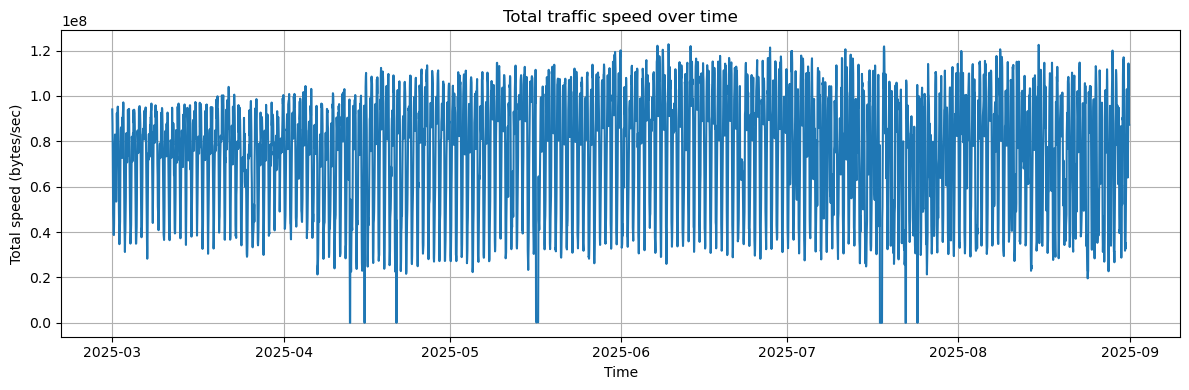

In [61]:
plt.figure(figsize=(12, 4))
plt.plot(df["timestamp"], df["total_speed"])
plt.xlabel("Time")
plt.ylabel("Total speed (bytes/sec)")
plt.title("Total traffic speed over time")
plt.tight_layout()
plt.grid(True)
plt.show()

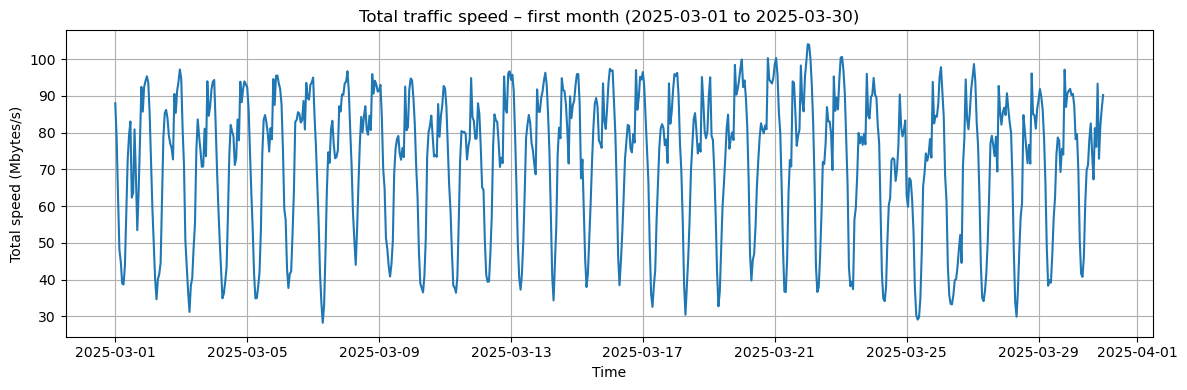

In [84]:
start = pd.Timestamp("2025-03-01") 
month_end = start + pd.Timedelta(days=30)

df_month = df[(df["timestamp"] >= start) & (df["timestamp"] < month_end)]

plt.figure(figsize=(12, 4))
plt.plot(df_month["timestamp"], df_month["total_speed"]/1e6)
plt.xlabel("Time")
plt.ylabel("Total speed (Mbytes/s)")
plt.title(f"Total traffic speed – first month ({start.date()} to {(month_end - pd.Timedelta(days=1)).date()})")
plt.tight_layout()
plt.grid(True)
plt.show()

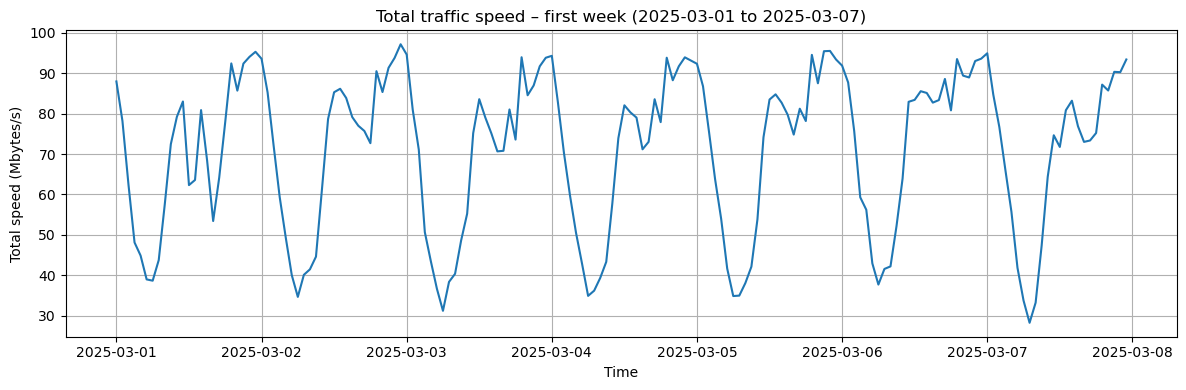

In [83]:
week_end = start + pd.Timedelta(days=7)

df_week = df[(df["timestamp"] >= start) & (df["timestamp"] < week_end)]

plt.figure(figsize=(12, 4))
plt.plot(df_week["timestamp"], df_week["total_speed"]/1e6)
plt.xlabel("Time")
plt.ylabel("Total speed (Mbytes/s)")
plt.title(f"Total traffic speed – first week ({start.date()} to {(week_end - pd.Timedelta(days=1)).date()})")
plt.tight_layout()
plt.grid(True)
plt.show()

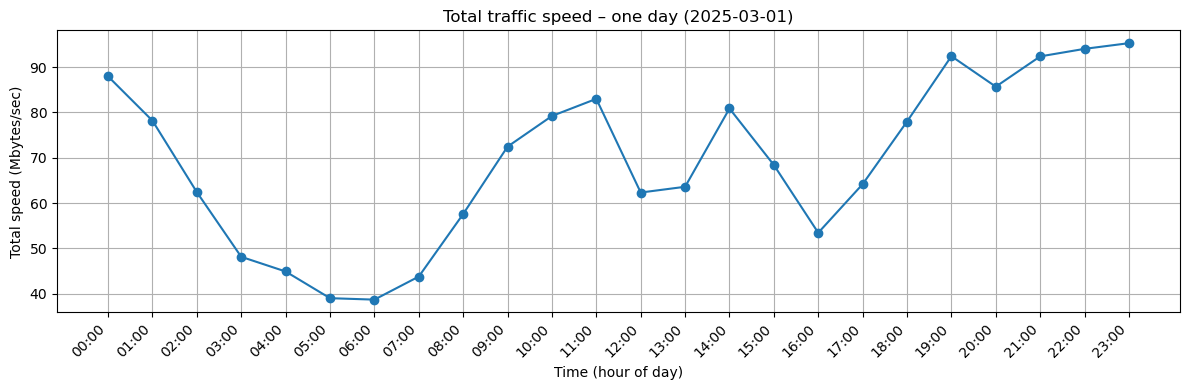

In [82]:
fig, ax = plt.subplots(figsize=(12, 4))

ax.plot(df_day["timestamp"], df_day["total_speed"]/1e6, marker="o")

ax.set_xticks(df_day["timestamp"])
ax.set_xticklabels(
    df_day["timestamp"].dt.strftime("%H:%M"),
    rotation=45,
    ha="right",
)

ax.set_xlabel("Time (hour of day)")
ax.set_ylabel("Total speed (Mbytes/sec)")
ax.set_title(f"Total traffic speed – one day ({start.date()})")

fig.tight_layout()
plt.grid(True)
plt.show()

<h3>3.3: Average total_speed by hour of day</h3>

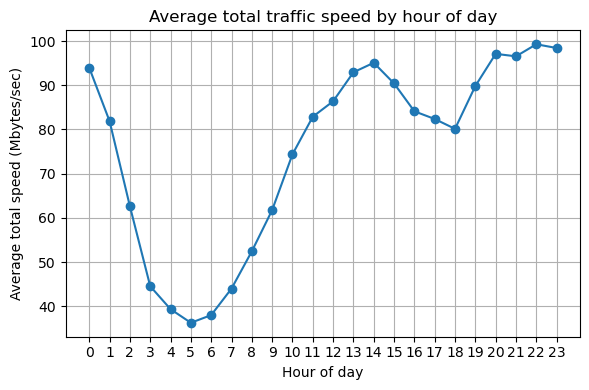

hour
0     9.395441e+07
1     8.187277e+07
2     6.261947e+07
3     4.454345e+07
4     3.936119e+07
5     3.627970e+07
6     3.802086e+07
7     4.401157e+07
8     5.244971e+07
9     6.176953e+07
10    7.438206e+07
11    8.288590e+07
12    8.637715e+07
13    9.293765e+07
14    9.508910e+07
15    9.041144e+07
16    8.411258e+07
17    8.237235e+07
18    8.014877e+07
19    8.983557e+07
20    9.710940e+07
21    9.654688e+07
22    9.927661e+07
23    9.842925e+07
Name: total_speed, dtype: float64

In [81]:
hourly_mean = df.groupby("hour")["total_speed"].mean()

plt.figure(figsize=(6, 4))
plt.plot(hourly_mean.index, hourly_mean.values/1e6, marker="o")

plt.xlabel("Hour of day")
plt.ylabel("Average total speed (Mbytes/sec)")
plt.title("Average total traffic speed by hour of day")
plt.xticks(range(0, 24))
plt.ticklabel_format(style="plain", axis="y")
plt.tight_layout()
plt.grid(True)
plt.show()

hourly_mean

<h3>3.4: Average total_speed by day of week</h3>

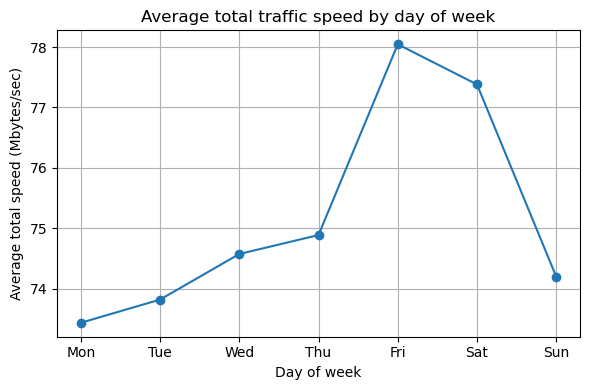

Mon    7.343614e+07
Tue    7.382049e+07
Wed    7.457480e+07
Thu    7.488860e+07
Fri    7.804681e+07
Sat    7.738142e+07
Sun    7.419939e+07
Name: total_speed, dtype: float64

In [90]:
dow_mean = df.groupby("dayofweek")["total_speed"].mean()
dow_mean.index = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]

plt.figure(figsize=(6, 4))
plt.plot(dow_mean.index, dow_mean.values/1e6, marker="o")
plt.xlabel("Day of week")
plt.ylabel("Average total speed (Mbytes/sec)")
plt.title("Average total traffic speed by day of week")
plt.xticks(range(0, 7))
plt.ticklabel_format(style="plain", axis="y")
plt.tight_layout()
plt.grid(True)
plt.show()

dow_mean

<h3>3.5: Distribution of total_speed</h3>

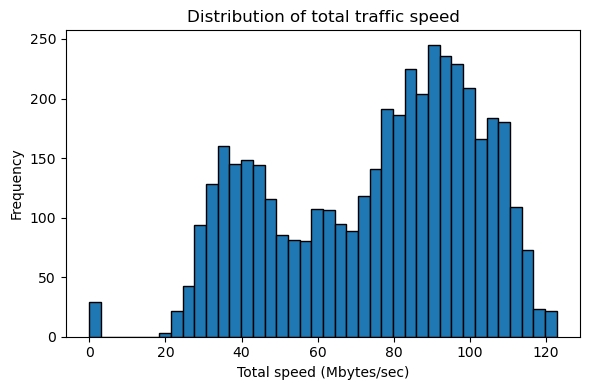

In [79]:
plt.figure(figsize=(6, 4))

plt.hist(
    df["total_speed"]/1e6,  
    bins=40,
    edgecolor="black"
)

plt.xlabel("Total speed (Mbytes/sec)")
plt.ylabel("Frequency")
plt.title("Distribution of total traffic speed")
plt.tight_layout()
plt.show()

<h3>3.6: Correlation between numeric features</h3>

In [85]:
num_cols = [
    "total_speed",
    "total_volume",
    "in_speed",
    "out_speed",
    "in_volume",
    "out_volume",
    "downtime",
    "coverage",
]

corr = df[num_cols].corr()
corr

,total_speed,total_volume,in_speed,out_speed,in_volume,out_volume,downtime,coverage
total_speed,1.000000,0.996233,0.867495,0.998857,0.862303,0.995407,-0.165972,-0.014803
total_volume,0.996233,1.000000,0.866649,0.994862,0.868858,0.998844,-0.195405,0.039164
in_speed,0.867495,0.866649,1.000000,0.842731,0.996302,0.842131,-0.188192,0.014773
out_speed,0.998857,0.994862,0.842731,1.000000,0.837468,0.996323,-0.161534,-0.017439
in_volume,0.862303,0.868858,0.996302,0.837468,1.000000,0.844167,-0.217025,0.069580
out_volume,0.995407,0.998844,0.842131,0.996323,0.844167,1.000000,-0.190622,0.035747
downtime,-0.165972,-0.195405,-0.188192,-0.161534,-0.217025,-0.190622,1.000000,-0.138039
coverage,-0.014803,0.039164,0.014773,-0.017439,0.069580,0.035747,-0.138039,1.000000


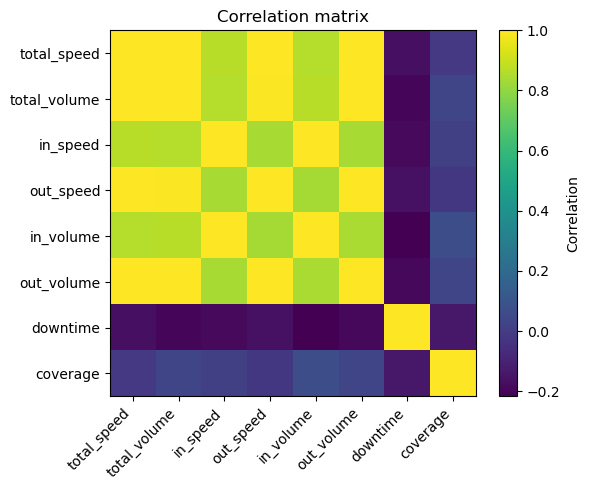

In [86]:
plt.figure(figsize=(6, 5))
plt.imshow(corr, aspect="auto")
plt.colorbar(label="Correlation")
plt.xticks(range(len(num_cols)), num_cols, rotation=45, ha="right")
plt.yticks(range(len(num_cols)), num_cols)
plt.title("Correlation matrix")
plt.tight_layout()
plt.show()

<h3>3.7: Average total_speed by dayofweek and hour</h3>

In [88]:
pivot_dow_hour = df.pivot_table(
    index="dayofweek",
    columns="hour",
    values="total_speed",
    aggfunc="mean",
)
pivot_dow_hour.index = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
pivot_dow_hour

hour,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
Mon,9.440009e+07,7.740186e+07,5.722950e+07,4.096139e+07,3.717694e+07,3.504084e+07,3.754041e+07,4.427812e+07,5.049360e+07,5.656635e+07,6.919205e+07,7.874906e+07,8.306442e+07,8.689190e+07,9.091478e+07,8.930993e+07,8.437658e+07,8.317765e+07,8.002788e+07,8.815547e+07,9.734429e+07,9.773413e+07,1.023354e+08,1.001048e+08
Tue,9.330570e+07,7.833452e+07,5.883374e+07,4.225422e+07,3.740102e+07,3.540263e+07,3.924831e+07,4.419954e+07,5.159348e+07,5.927946e+07,7.205618e+07,7.838526e+07,8.395077e+07,8.981554e+07,9.228802e+07,8.939548e+07,8.666995e+07,8.397431e+07,8.182378e+07,9.048989e+07,9.717080e+07,9.543861e+07,9.543082e+07,9.494975e+07
Wed,9.117719e+07,8.122082e+07,6.090887e+07,4.327419e+07,3.868927e+07,3.624925e+07,3.860227e+07,4.431012e+07,5.180899e+07,6.078169e+07,7.121310e+07,7.917087e+07,8.465812e+07,9.153000e+07,9.382375e+07,9.022403e+07,8.213644e+07,8.322702e+07,8.037504e+07,8.965277e+07,9.704005e+07,9.617070e+07,1.020027e+08,1.015480e+08
Thu,9.634427e+07,8.261649e+07,6.314182e+07,4.456906e+07,3.849420e+07,3.493140e+07,3.683126e+07,4.348203e+07,5.106849e+07,6.149429e+07,7.321236e+07,8.398185e+07,8.675067e+07,9.260935e+07,9.724512e+07,8.994743e+07,8.612016e+07,8.197927e+07,7.916854e+07,8.890075e+07,9.508071e+07,9.428416e+07,9.679977e+07,9.827293e+07
Fri,9.562950e+07,8.495895e+07,6.739643e+07,4.791203e+07,4.099807e+07,3.560212e+07,3.531736e+07,4.182699e+07,5.554723e+07,6.936641e+07,8.521391e+07,9.281037e+07,9.041217e+07,1.070529e+08,1.042786e+08,9.327717e+07,8.314533e+07,8.004319e+07,7.886746e+07,8.921043e+07,9.874154e+07,9.831103e+07,9.870076e+07,9.774578e+07
Sat,9.583867e+07,8.576306e+07,6.800105e+07,4.807873e+07,4.223357e+07,3.838318e+07,3.837099e+07,4.517717e+07,5.578744e+07,6.790089e+07,8.104919e+07,8.812072e+07,9.184211e+07,9.681684e+07,9.703761e+07,9.177354e+07,8.406470e+07,8.215850e+07,8.003348e+07,9.061958e+07,9.609010e+07,9.721614e+07,9.849792e+07,9.629891e+07
Sun,9.102563e+07,8.263478e+07,6.261798e+07,4.461581e+07,4.038541e+07,3.819395e+07,4.014044e+07,4.473441e+07,5.078444e+07,5.694726e+07,6.869975e+07,7.893386e+07,8.384883e+07,8.596597e+07,9.015081e+07,8.895608e+07,8.234477e+07,8.206650e+07,8.072737e+07,9.171756e+07,9.829201e+07,9.664390e+07,1.011277e+08,1.001928e+08


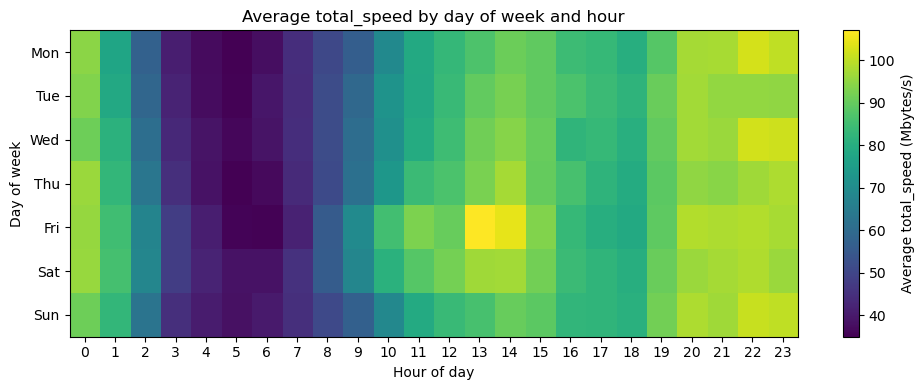

In [97]:
plt.figure(figsize=(10, 4))
pivot_scaled = pivot_dow_hour / 1e6
plt.imshow(pivot_scaled, aspect="auto")
plt.colorbar(label="Average total_speed (Mbytes/s)")
plt.xlabel("Hour of day")
plt.ylabel("Day of week")
plt.title("Average total_speed by day of week and hour")
plt.xticks(range(0, 24))
plt.yticks(
    range(7),
    ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
)
plt.tight_layout()
plt.show()

<h3>3.8: Summary </h3>

- **Global behaviour**
  - Over the full 6-month period the total traffic speed fluctuates between roughly 30–120 MBytes/s, with a very clear daily oscillation (regular peaks and troughs each day).
  - The overall level of traffic is fairly stable across months, but there are a few sharp drops towards zero, which are strong candidates for outages or downtime events.

- **Hour-of-day pattern**
  - When averaging over all days, traffic is lowest around 04:00–06:00, where the mean speed drops to about 35–40 MBytes/s.
  - From the early morning onwards, traffic gradually increases and reaches two main peaks:
    - a daytime peak around 13:00–15:00, and  
    - an evening peak around 20:00–23:00, where average speed approaches 100 MBytes/s.
  - This suggests a typical usage pattern with minimal activity at night, high activity after working hours, and another strong peak in the late evening.

- **Day-of-week pattern**
    - All weekdays (Sun–Thu) have broadly similar average traffic, with Monday showing the lowest mean speed (≈ 73–74 MBytes/s).
    - Friday, which is part of the weekend, actually has the highest average load (≈ 78 MBytes/s).
    - Saturday is only slightly below Friday (Maybe because it's not a day off for all).
  - This indicates that the network is heavily used even on weekends, particularly on Friday.

- **Distribution of total speed**
  - The histogram of `total_speed` (in MBytes/s) is right-skewed and appears multi-modal:
    - One concentration of values in the 30–60 MBytes/s range, and  
    - A dominant cluster in the 70–110 MBytes/s range.
  - A small number of very low values (near zero) correspond to periods of downtime or extremely low traffic.

- **Joint day–hour pattern**
  - The day-by-hour heatmap shows that:
    - Very low speeds occur on all days between roughly 03:00 and 06:00.
    - High speeds (≥ 90–100 MBytes/s) are concentrated around midday to afternoon (≈ 11:00–15:00) and evening hours (≈ 19:00–23:00).
    - Friday in particular shows very bright cells around midday and evening, confirming that weekend usage is intense, not quiet.
  - Overall, the time-of-day effect is stronger than the weekday/weekend effect: the same hours tend to be busy on both working days and weekends.

- **Correlations between numeric features**
  - `total_speed` is very strongly positively correlated with:
    - `total_volume`, `in_speed`, `out_speed`, `in_volume`, and `out_volume`.
    - This is expected since all of these measure different aspects of the same traffic flow.
  - `downtime` shows a weak negative correlation with traffic (higher downtime associated with slightly lower speeds).
  - `coverage` is weakly positively correlated with speeds and volumes, consistent with better coverage during periods of higher activity.
  - These correlations justify using the various speed/volume metrics as features for forecasting `total_speed`, while `downtime` and `coverage` provide additional contextual information.

Overall, we can conclude that the dataset has strong and regular daily patterns. These characteristics will be important for both forecasting and anomaly detection in later phases.